In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import multinomial
from pca import pca
from gmm import *
import copy
import random

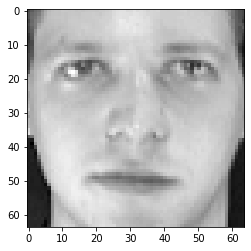

In [3]:
# load synthetic data from MATLAB data file

variables = dict()
loadmat('olivettiFaces.mat', variables)

faces = variables['faces']

# convert faces data to floats
faces = faces.astype(float) / 255.0

# center data
faces = faces - faces.mean(0)

# plot a face
plt.imshow(faces[:, 0].reshape((64, 64)).T, cmap='gray')

Text(0, 0.5, 'Captured Variance')

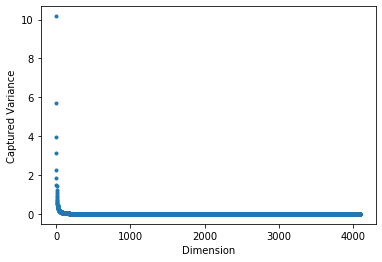

In [4]:
new_data, variances, vectors = pca(faces)

plt.figure()
plt.plot(variances.ravel(), '.')
plt.xlabel('Dimension')
plt.ylabel('Captured Variance')

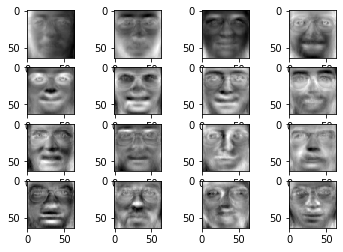

In [5]:
# plot first 16 eigenvectors

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(vectors[:, i].reshape((64, 64)).T, cmap='gray')

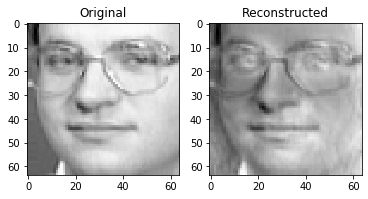

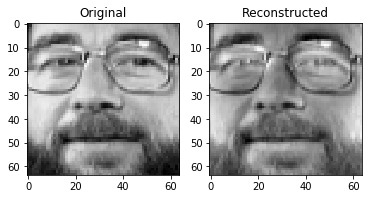

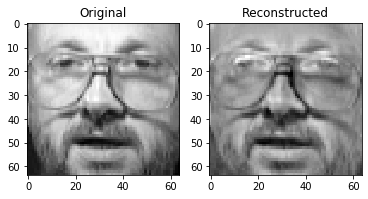

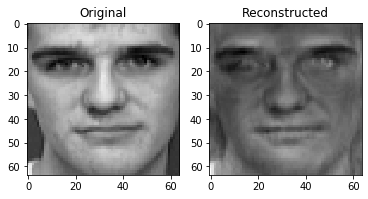

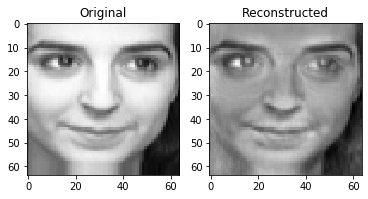

In [6]:
# plot projections 

num_faces = faces.shape[1]

d = 200

for x in range(5):
    i = random.randint(0, num_faces - 1)
    plt.subplot(121)
    plt.imshow(faces[:, i].reshape((64, 64)).T, cmap='gray')
    plt.title('Original');
        
    plt.subplot(122)
    projection = vectors[:, :d].dot(new_data[:d, i])
    plt.imshow(projection.reshape((64, 64)).T, cmap='gray')
    plt.title('Reconstructed');
    plt.show()

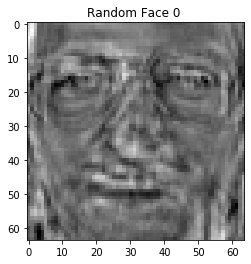

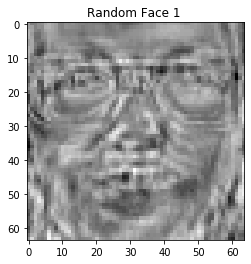

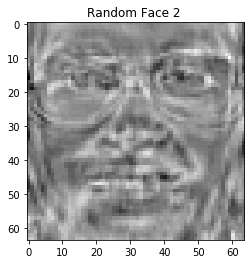

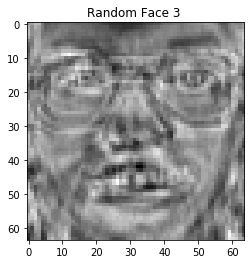

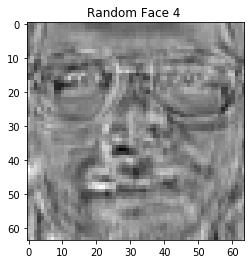

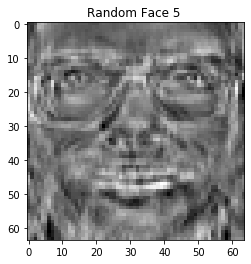

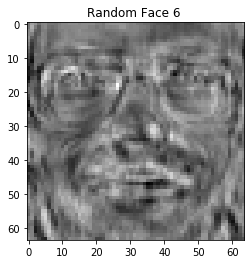

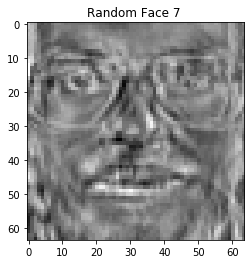

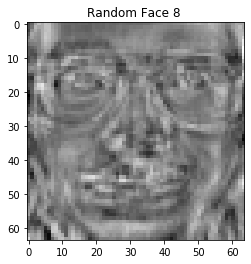

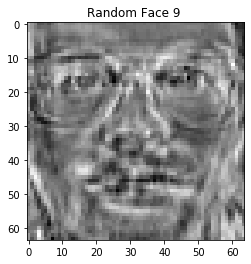

In [7]:
# generate random faces

d = 200

for i in range(10):
    projection = vectors[:, :d].dot(np.random.randn(d))
    plt.imshow(projection.reshape((64, 64)).T, cmap='gray')
    plt.title('Random Face %d ' % i)
    plt.show()

Start GMM with 8 clusters. For this set of data:
dimension "d" is 200, data points "n" is 400
change (5.24E-06) is smaller than tolerance (1.00E-04).
Aborting loops...
Complete 3 iterations.



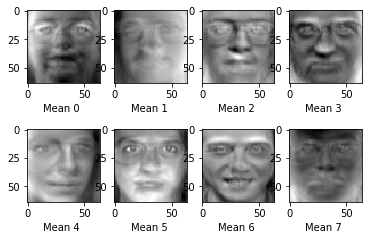

In [16]:
# Try GMM

num_clusters = 8

d = 200

data = new_data[:d, :]

means, sigmas, probs = gmm(data, num_clusters)

for i in range(num_clusters):
    plt.subplot(np.ceil(num_clusters / 4), 4, i + 1)
    
    mean_image = vectors[:, :d].dot(means[:, i])
    plt.imshow(mean_image.reshape((64, 64)).T, cmap='gray')
    plt.xlabel('Mean %d ' % i)

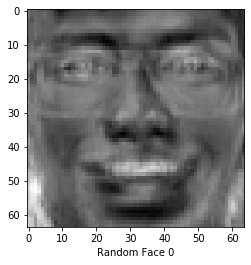

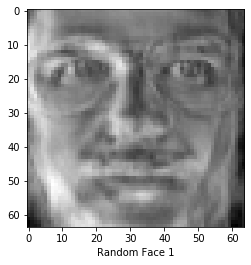

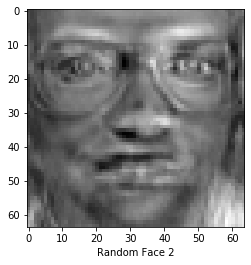

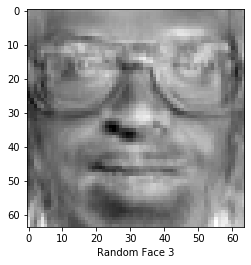

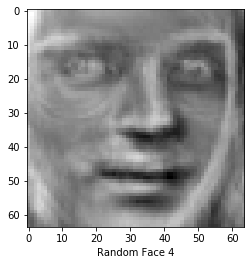

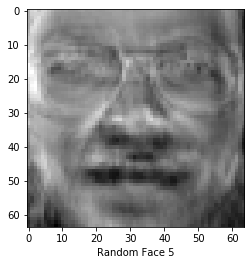

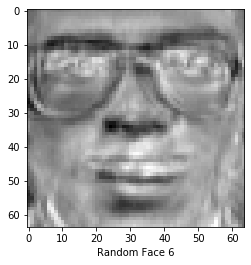

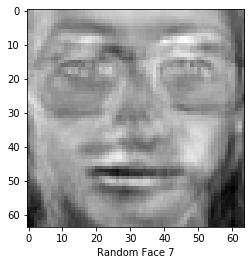

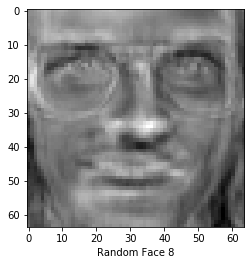

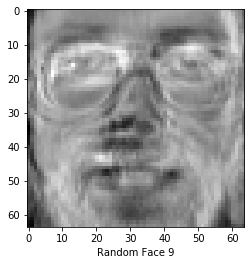

In [17]:
# sample faces from GMM

for i in range(10):
    k = np.random.choice(np.arange(num_clusters), p=probs.flatten())
    x = sample_gaussian(means[:, k], sigmas[k], 1)
    face = vectors[:, :d].dot(x)
    plt.imshow(face.reshape((64, 64)).T, cmap='gray')
    plt.xlabel('Random Face %d' % i)
    plt.show()